In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import neattext.functions as nfx

In [4]:
df = pd.read_csv("emotion_dataset_2.csv")

In [5]:
df.drop(['Clean_Text'], axis=1)

,Unnamed: 0,Emotion,Text
0,0,neutral,Why ?
1,1,joy,Sage Act upgrade on my to do list for tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,3,joy,Such an eye ! The true hazel eye-and so brill...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,34788,joy,The world didnt give it to me..so the world MO...
34789,34789,anger,A man robbed me today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [6]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
df.shape

(34792, 4)

In [8]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [9]:
df.drop(df.loc[df['Emotion']=='shame'].index, inplace=True)
df.drop(df.loc[df['Emotion']=='disgust'].index, inplace=True)

In [10]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
Name: Emotion, dtype: int64

<AxesSubplot:>

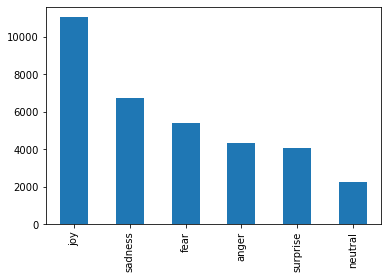

In [11]:
df['Emotion'].value_counts().plot(kind='bar')

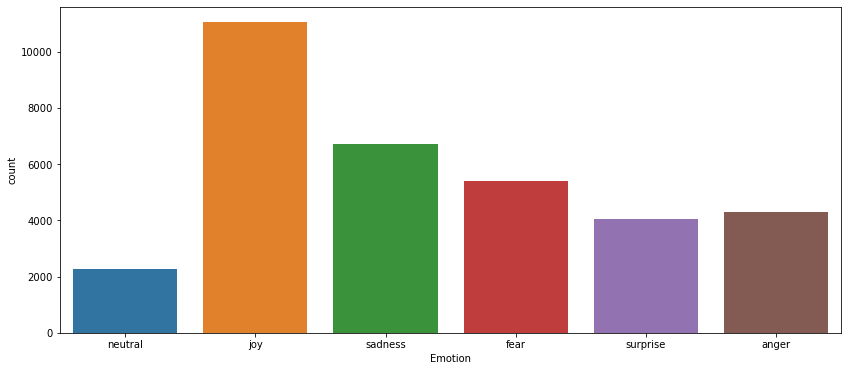

In [12]:
plt.figure(figsize=(14,6))
sns.countplot(x='Emotion',data=df)
plt.show()

In [13]:
df['clean_text']=df['Text'].apply(nfx.remove_stopwords)

In [14]:
df['clean_text']=df['clean_text'].apply(nfx.remove_userhandles)

In [15]:
df['clean_text']=df['clean_text'].apply(nfx.remove_punctuations)

In [16]:
df[['Text','clean_text']].head()

,Text,clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [17]:
#model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [35]:
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#performance evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [19]:
#split dataset
from sklearn.model_selection import train_test_split

In [20]:
xfeatures = df['clean_text']
ylabels = df['Emotion']

In [21]:
cv = CountVectorizer()
X = cv.fit_transform(xfeatures)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,train_size=0.3)

In [23]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [24]:
nv_model.score(X_test,y_test)

0.5332938739271974

In [25]:
y_pred_for_nv = nv_model.predict(X_test)

In [26]:
y_pred_for_nv

array(['joy', 'joy', 'fear', ..., 'joy', 'sadness', 'joy'], dtype='<U8')

In [27]:
sample_text = ['i hate reading']

In [28]:
vect = cv.transform(sample_text).toarray()

In [29]:
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

In [30]:
np.max(nv_model.predict_proba(vect))

0.693541402528174

In [32]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.70      0.34      0.46      3006
        fear       0.74      0.49      0.59      3818
         joy       0.47      0.89      0.62      7720
     neutral       0.41      0.01      0.02      1590
     sadness       0.54      0.46      0.50      4667
    surprise       0.65      0.23      0.34      2852

    accuracy                           0.53     23653
   macro avg       0.59      0.40      0.42     23653
weighted avg       0.58      0.53      0.50     23653



In [33]:
confusion_matrix(y_test,y_pred_for_nv)

array([[1026,  143, 1269,    6,  546,   16],
       [ 129, 1858, 1264,    4,  449,  114],
       [  90,  168, 6899,    9,  424,  130],
       [  24,   40, 1367,   19,  133,    7],
       [ 127,  180, 2114,    3, 2166,   77],
       [  65,  133, 1721,    5,  282,  646]], dtype=int64)

C:\Users\S Sangeetha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


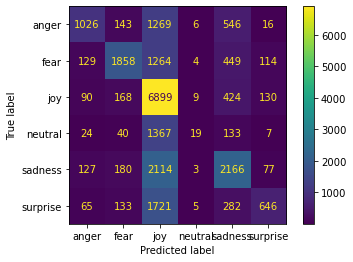

In [36]:
plot_confusion_matrix(nv_model,X_test,y_test)

In [37]:
import joblib

In [38]:
model_file = open("emotion_classifier_nv_model_15.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()